In [1]:
import matplotlib.pyplot as plt
import numpy as np
import functions
import importlib
importlib.reload(functions)
from dadapy import MetricComparisons

import os 
IIfolder = f'results/II/vocab/'
os.makedirs(IIfolder,exist_ok=True)


LLM = 'Pythia'
# modelname = "EleutherEI/pythia-410m-deduped"
modelname = "EleutherAI/pythia-1b"  # Example valid model

# LLM = 'OPT'
# modelname = "facebook/opt-350m"

model,tokenizer = functions.get_model(LLM,
                                  modelname,
                                  load_tokenizer=False)
print(model)
E = model.config.hidden_size

/leonardo/home/userexternal/sacevedo/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 2048)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-15): 16 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXAttention(
          (rotary_emb): GPTNeoXRotaryEmbedding()
          (query_key_value): Linear(in_features=2048, out_features=6144, bias=True)
          (dense): Linear(in_features=2048, out_features=2048, bias=True)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=2048, out_features=8192, bias=True)
          (dense_4h_to_h): Linear(in_features=8192, out_features=2048, bias=True)
  

In [2]:
embedding_matrix = model.get_input_embeddings().weight.detach().numpy()
print("Embedding matrix shape:", embedding_matrix.shape)
# E = embedding_matrix.T @ embedding_matrix
# E.shape
# del(embedding_matrix)

Embedding matrix shape: (50304, 2048)


In [3]:
unembedding_matrix = model.get_output_embeddings().weight.detach().numpy()
print("Unembedding matrix shape:", unembedding_matrix.shape)
# U = unembedding_matrix.T @ unembedding_matrix
# del(unembedding_matrix)

Unembedding matrix shape: (50304, 2048)


In [4]:
X = np.concatenate((embedding_matrix,
                    unembedding_matrix),
                  axis=1)
del embedding_matrix
del unembedding_matrix

In [5]:
T_list = [30000]
T_list = np.arange(1,10+1,dtype=int) * 10000
for T_id,T in enumerate(T_list):
  print(f'{T=}')

  maxk = X[:T,:].shape[0] - 1
  # if T >= 10000:
  maxk //= 10
  MC = MetricComparisons(X[:T,:], maxk=maxk)
  II = MC.return_inf_imb_two_selected_coords(coords1=np.arange(0,E,dtype=int), 
                                            coords2=np.arange(E,2*E,dtype=int), 
                                            k=1)
  print(f'{II=}')
  np.savetxt(fname=f'{IIfolder}T{T}.txt',X=II,fmt='%.5f')

T=10000
II=(0.0102959, 0.041805020000000005)
T=20000


: 

In [5]:
T_list = np.array([10,100,1000])
T_list = np.concatenate((T_list,
                         np.arange(1,10+1,dtype=int) * 1000)
)
T_list = np.concatenate((T_list,
                         np.arange(2,2+1,dtype=int) * 10000)
)
II = np.empty(shape=(len(T_list),
                     2))
for T_id,T in enumerate(T_list):
  II[T_id,:] = np.loadtxt(f'{IIfolder}T{T}.txt')

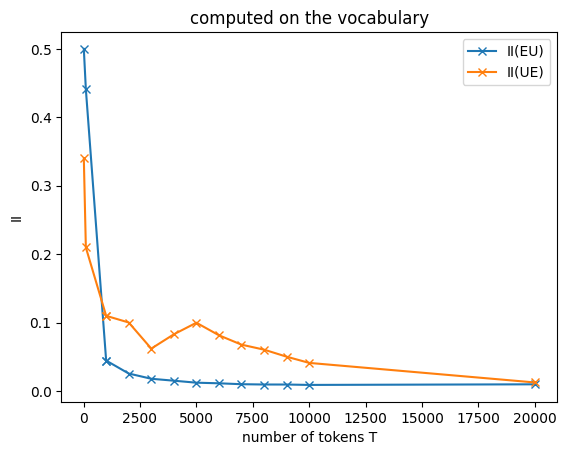

In [6]:
plt.plot(T_list,II[:,0],'x-',label=f'II(EU)')
plt.plot(T_list,II[:,1],'x-',label=f'II(UE)')
plt.title(f'computed on the vocabulary')
plt.ylabel(f'II')
plt.xlabel(f'number of tokens T')
plt.legend()
plt.show()

In [4]:
Eeigenvalues,Eeigenvectors = np.linalg.eigh(E)
Ueigenvalues,Ueigenvectors = np.linalg.eigh(U)

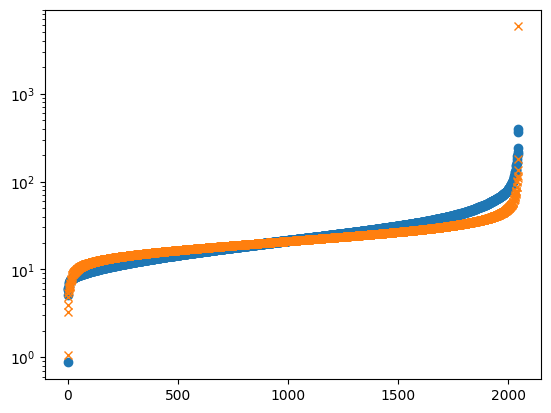

In [6]:
import matplotlib.pyplot as plt
plt.plot(Eeigenvalues,'o')
plt.plot(Ueigenvalues,'x')
plt.yscale('log')

In [19]:
for t in np.arange(-15,0,1):
  sim = np.dot(Eeigenvectors[t],Ueigenvectors[t])
  print(f'{sim=}')

sim=-0.01234066
sim=0.011344612
sim=-0.016328791
sim=0.057344034
sim=-0.033279426
sim=0.007034626
sim=-0.00038717268
sim=0.011977595
sim=0.019512186
sim=0.017920736
sim=0.015525201
sim=0.03392646
sim=0.004622566
sim=0.06010172
sim=0.0030604796


### Similarity measures:

In [64]:
N = 10000
spike = 1000

X = np.random.normal(size=N)
mu0 = np.mean(X)
std0 = np.std(X)
X = np.r_[X,spike]
mu = np.mean(X)
std = np.std(X)

print(mu0,std0)
print(mu,std)

0.0028007884161793425 0.986774439470662
0.10279050936524282 10.047540464534855


-0.01815190753220946 1.0017383047110653
-0.008151092422967162 1.4154654081568259
